In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np

In [2]:
hamburg_df = pd.read_csv("../data/AirView_Hamburg_Measurements_ugm3.csv")

In [3]:
hamburg_df['gps_timestamp'] = pd.to_datetime(hamburg_df['gps_timestamp'])

In [4]:
hamburg_df.columns

Index(['gps_timestamp', 'latitude', 'longitude', 'NO_ugm3', 'NO2_ugm3',
       'O3_ugm3', 'CO_mgm3', 'CO2_mgm3', 'PMch1_perL', 'PMch2_perL',
       'PMch3_perL', 'PMch4_perL', 'PMch5_perL', 'PMch6_perL', 'PM25_ugm3'],
      dtype='object')

Filtering Functions

In [5]:
def filter_between_months(dataset, timestamp_column, start_month, end_month):
    # Filter for dates between March and August in either 2021 or 2022
    filtered_dataset = dataset[
    (dataset[timestamp_column].dt.month >= start_month) &
    (dataset[timestamp_column].dt.month <= end_month)
    ]

    return filtered_dataset

# def filter_same_day_different_year(dataset, timestamp_column):
#     if len(dataset[timestamp_column].dt.year.unique()) == 1:
#         print(f"Dataset already only contains data for 1 year: {dataset[timestamp_column].dt.year.unique()[0]}")
#         return dataset
#     else:
#         seen_dates = set()
#         for date in dataset[timestamp_column].dt.date.unique():
#             date_tup = (date.month, date.day)
#             if date_tup not in seen_dates:


In [6]:
filtered_hamburg_df = filter_between_months(hamburg_df, 'gps_timestamp', 3, 8)

In [7]:
filtered_hamburg_df.to_csv("../data/AirView_Hamburg_Measurements_filtered_dates.csv")

In [8]:
unique_days = filtered_hamburg_df["gps_timestamp"].dt.date.unique()
unique_years = filtered_hamburg_df["gps_timestamp"].dt.year.unique()
print(f"There are {len(unique_days)} unique days in the dataset over {unique_years}")

There are 83 unique days in the dataset over [2022]


In [9]:
solstice_day_2022 = pd.to_datetime("2022-06-21")

In [10]:
filtered_hamburg_df["diff_solstice_day"] = abs(filtered_hamburg_df["gps_timestamp"].dt.date.values - [solstice_day_2022.date()]*filtered_hamburg_df.shape[0])

C:\Users\Dila Ozberkman\AppData\Local\Temp\ipykernel_29000\2087265977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hamburg_df["diff_solstice_day"] = abs(filtered_hamburg_df["gps_timestamp"].dt.date.values - [solstice_day_2022.date()]*filtered_hamburg_df.shape[0])


In [11]:
diff_sols_2022 = sorted(list(filtered_hamburg_df["diff_solstice_day"].unique()))
diff_sols_2022

[Timedelta('6 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('8 days 00:00:00'),
 Timedelta('11 days 00:00:00'),
 Timedelta('12 days 00:00:00'),
 Timedelta('13 days 00:00:00'),
 Timedelta('14 days 00:00:00'),
 Timedelta('15 days 00:00:00'),
 Timedelta('16 days 00:00:00'),
 Timedelta('17 days 00:00:00'),
 Timedelta('18 days 00:00:00'),
 Timedelta('20 days 00:00:00'),
 Timedelta('21 days 00:00:00'),
 Timedelta('22 days 00:00:00'),
 Timedelta('23 days 00:00:00'),
 Timedelta('24 days 00:00:00'),
 Timedelta('27 days 00:00:00'),
 Timedelta('28 days 00:00:00'),
 Timedelta('29 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('32 days 00:00:00'),
 Timedelta('34 days 00:00:00'),
 Timedelta('35 days 00:00:00'),
 Timedelta('36 days 00:00:00'),
 Timedelta('37 days 00:00:00'),
 Timedelta('38 days 00:00:00'),
 Timedelta('39 days 00:00:00'),
 Timedelta('40 days 00:00:00'),
 Timedelta('41 days 00:00:00'),
 Timedelta('42 days 00:00:00'),
 Timedelta(

In [12]:
def try_binning(dataset, solstice_day, timestamp_colmn, grouping_cutoff=5):
    dataset["diff_solstice_day"] = abs(
        dataset[timestamp_colmn].dt.date.values - [solstice_day.date()]*dataset.shape[0]
        )

    diff_sols = sorted(list(dataset["diff_solstice_day"].unique()))
    print(f"There are {len(diff_sols)} days to calculate for before binning")

    group_cutoff = timedelta(days=grouping_cutoff)
    previous = None
    grouping = []

    for diff in diff_sols:
        if previous is None:
            previous = diff
            grouping.append(diff)
            continue
        if abs(diff - previous) <= group_cutoff:
            continue
        else:
            grouping.append(diff)
            previous = diff

    print(f"There are {len(grouping)} to calculate for after grouping")

    good_interval = [False]*len(diff_sols)

    for i, diff in enumerate(diff_sols):
        for calc_day in grouping:
            if abs(diff - calc_day) <= group_cutoff:
                good_interval[i] = True
                break

    print(f"All dates within {group_cutoff} of a simulated day: {all(good_interval)}")

    return grouping, diff_sols

grouping, diff_sols = try_binning(filtered_hamburg_df, solstice_day_2022, "gps_timestamp", grouping_cutoff=5)

There are 76 days to calculate for before binning
There are 17 to calculate for after grouping
All dates within 5 days, 0:00:00 of a simulated day: True


C:\Users\Dila Ozberkman\AppData\Local\Temp\ipykernel_29000\753445337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["diff_solstice_day"] = abs(


In [13]:
grouping

[Timedelta('6 days 00:00:00'),
 Timedelta('12 days 00:00:00'),
 Timedelta('18 days 00:00:00'),
 Timedelta('24 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('36 days 00:00:00'),
 Timedelta('42 days 00:00:00'),
 Timedelta('49 days 00:00:00'),
 Timedelta('55 days 00:00:00'),
 Timedelta('61 days 00:00:00'),
 Timedelta('70 days 00:00:00'),
 Timedelta('77 days 00:00:00'),
 Timedelta('83 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('96 days 00:00:00'),
 Timedelta('102 days 00:00:00'),
 Timedelta('109 days 00:00:00')]

In [14]:
solstice_day_2022 + grouping[0]

Timestamp('2022-06-27 00:00:00')

In [15]:
diff_sols

[Timedelta('6 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('8 days 00:00:00'),
 Timedelta('11 days 00:00:00'),
 Timedelta('12 days 00:00:00'),
 Timedelta('13 days 00:00:00'),
 Timedelta('14 days 00:00:00'),
 Timedelta('15 days 00:00:00'),
 Timedelta('16 days 00:00:00'),
 Timedelta('17 days 00:00:00'),
 Timedelta('18 days 00:00:00'),
 Timedelta('20 days 00:00:00'),
 Timedelta('21 days 00:00:00'),
 Timedelta('22 days 00:00:00'),
 Timedelta('23 days 00:00:00'),
 Timedelta('24 days 00:00:00'),
 Timedelta('27 days 00:00:00'),
 Timedelta('28 days 00:00:00'),
 Timedelta('29 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('32 days 00:00:00'),
 Timedelta('34 days 00:00:00'),
 Timedelta('35 days 00:00:00'),
 Timedelta('36 days 00:00:00'),
 Timedelta('37 days 00:00:00'),
 Timedelta('38 days 00:00:00'),
 Timedelta('39 days 00:00:00'),
 Timedelta('40 days 00:00:00'),
 Timedelta('41 days 00:00:00'),
 Timedelta('42 days 00:00:00'),
 Timedelta(

In [16]:
grouping

[Timedelta('6 days 00:00:00'),
 Timedelta('12 days 00:00:00'),
 Timedelta('18 days 00:00:00'),
 Timedelta('24 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('36 days 00:00:00'),
 Timedelta('42 days 00:00:00'),
 Timedelta('49 days 00:00:00'),
 Timedelta('55 days 00:00:00'),
 Timedelta('61 days 00:00:00'),
 Timedelta('70 days 00:00:00'),
 Timedelta('77 days 00:00:00'),
 Timedelta('83 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('96 days 00:00:00'),
 Timedelta('102 days 00:00:00'),
 Timedelta('109 days 00:00:00')]

Root mean squared error: 0.3233683
Mean absolute error: 0.10562185


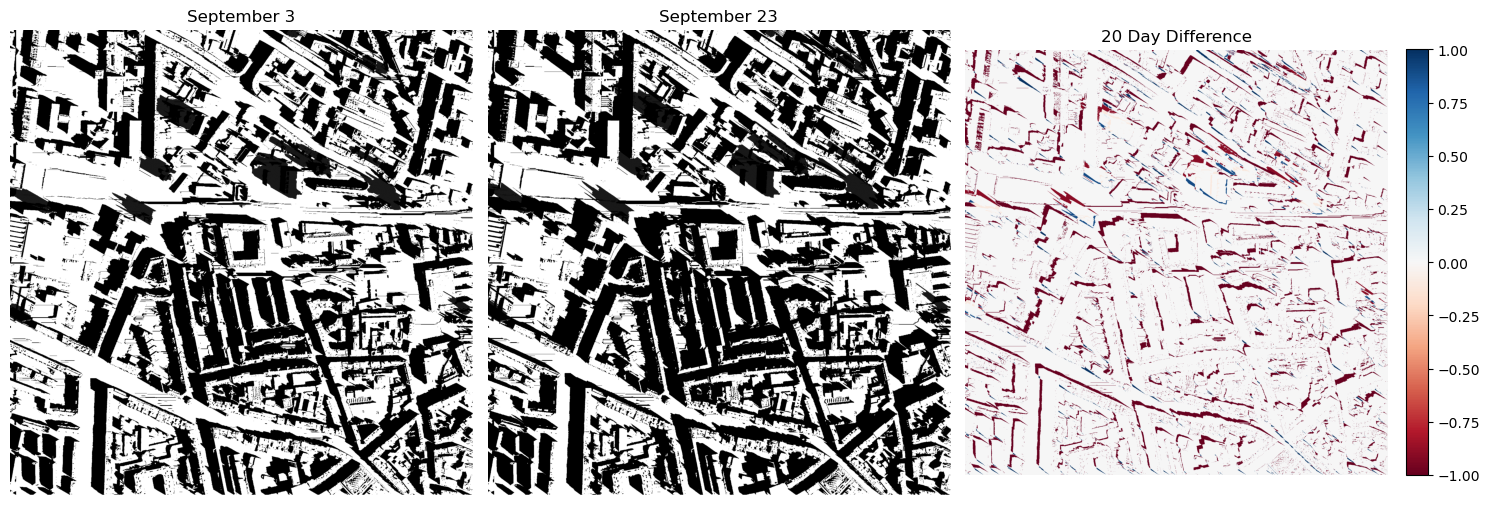

In [33]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def load_tif(filename):
    """Read a single-band .tif file and return it as a NumPy array."""
    with rasterio.open(filename) as src:
        image = src.read(1)  # Read the first band
    return image

# Load the two .tif images for the two different days.
image1 = load_tif("../code/results/output/d48092b5/tree_shade/1/d48092b5_p_1_Shadow_20220903_0900_LST.tif")
image2 = load_tif("../code/results/output/d48092b5/tree_shade/1/d48092b5_p_1_Shadow_20220923_0900_LST.tif")

# Compute the pixel-wise difference.
diff_image = image2 - image1

# Calculate difference metrics.
rmse = np.sqrt(np.mean(diff_image**2))
mae = np.mean(np.abs(diff_image))

print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)

# Visualize the images side by side.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image from day 1.
axes[0].imshow(image1, cmap='gray')
axes[0].set_title("September 3")
axes[0].axis('off')

# Image from day 2.
axes[1].imshow(image2, cmap='gray')
axes[1].set_title("September 23")
axes[1].axis('off')

# Difference image.
im = axes[2].imshow(diff_image, cmap='RdBu')
axes[2].set_title("20 Day Difference")
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


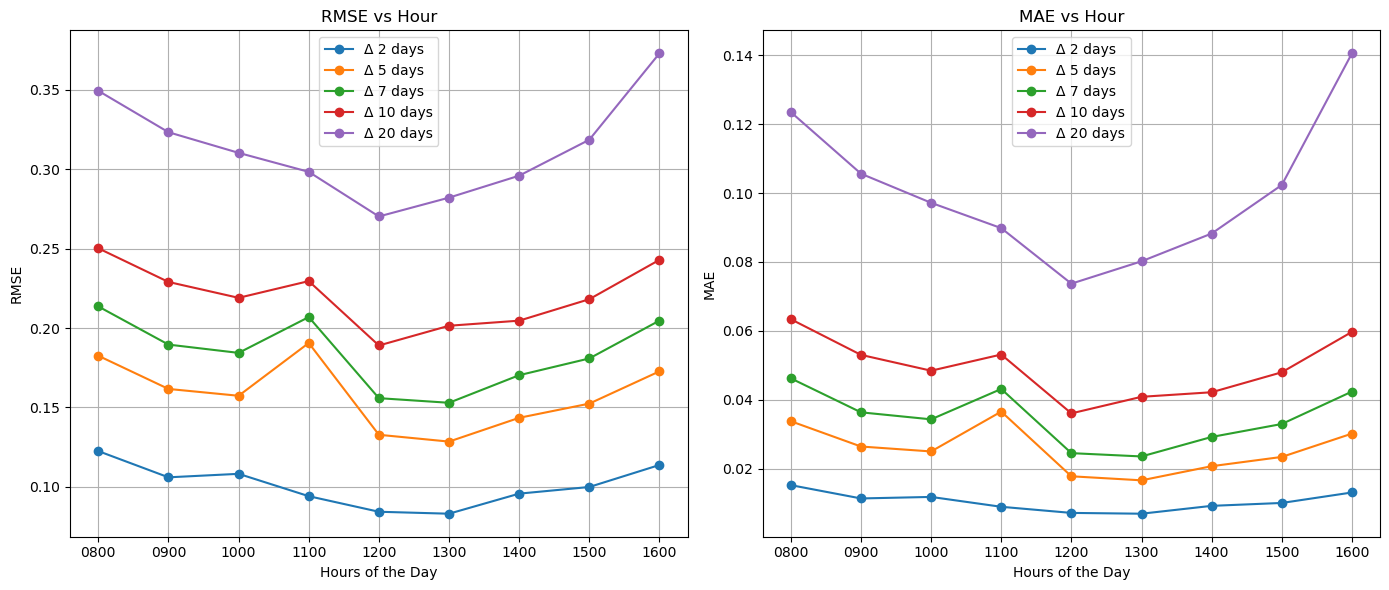

In [34]:
hrs = ["0800", "0900", "1000", "1100", "1200", "1300", "1400", "1500", "1600"]

# Define the day differences you want to analyze.
day_differences = [(2, "20220908", "20220910"), (5, "20220903", "20220908"), (7, "20220903", "20220910"),
                   (10, "20220903", "20220913"), (20, "20220903", "20220923")]

# Create two subplots: one for RMSE and one for MAE.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop over each day difference.
for diff, first, last in day_differences:
    # Lists to store RMSE and MAE values for each day difference.
    rmse_values = []
    mae_values = []

    for h in hrs:
        filename1 = f"../code/results/output/d48092b5/tree_shade/1/d48092b5_p_1_Shadow_{first}_{h}_LST.tif"
        filename2 = f"../code/results/output/d48092b5/tree_shade/1/d48092b5_p_1_Shadow_{last}_{h}_LST.tif"
        image1 = load_tif(filename1)
        image2 = load_tif(filename2)

        # Compute the difference between the current image and the reference image.
        diff_image = image1 - image2

        # Calculate RMSE and MAE.
        rmse = np.sqrt(np.mean(diff_image**2))
        mae = np.mean(np.abs(diff_image))

        # Store the computed metrics.
        rmse_values.append(rmse)
        mae_values.append(mae)

    ax1.plot(hrs, rmse_values, marker='o', linestyle='-', label=f"Δ {diff} days")
    ax2.plot(hrs, mae_values, marker='o', linestyle='-', label=f"Δ {diff} days")

# Plot RMSE vs Day Difference.
ax1.set_title("RMSE vs Hour")
ax1.set_xlabel("Hours of the Day")
ax1.set_ylabel("RMSE")
ax1.grid(True)
ax1.legend()

# Plot MAE vs Day Difference.
ax2.set_title("MAE vs Hour")
ax2.set_xlabel("Hours of the Day")
ax2.set_ylabel("MAE")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()